# MSA 2024 Phase 2 - Part 1

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [10]:
#Importing data
Sales_data = pd.read_csv("store_sales.csv", encoding='latin1',delimiter=',',header='infer')
Sales_data["Order Date"] = pd.to_datetime(Sales_data["Order Date"])
Sales_data["Ship Date"] = pd.to_datetime(Sales_data["Ship Date"])
print("Below is the first 10 rows in the dataset")
print(Sales_data.head(n=10))
print("Below is the basic information about the data contained in each column")
print(Sales_data.info())
print("Below is the basic summary of the data")
print(Sales_data.describe())

Below is the first 10 rows in the dataset
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4      11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
5      24  US-2017-156909 2017-07-16 2017-07-18    Second Class    SF-20065   
6      25  CA-2015-106320 2015-09-25 2015-09-30  Standard Class    EB-13870   
7      28  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
8      30  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
9      37  CA-2016-117590 2016-12-08 2016-12-10     First Class    GH-14485   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute

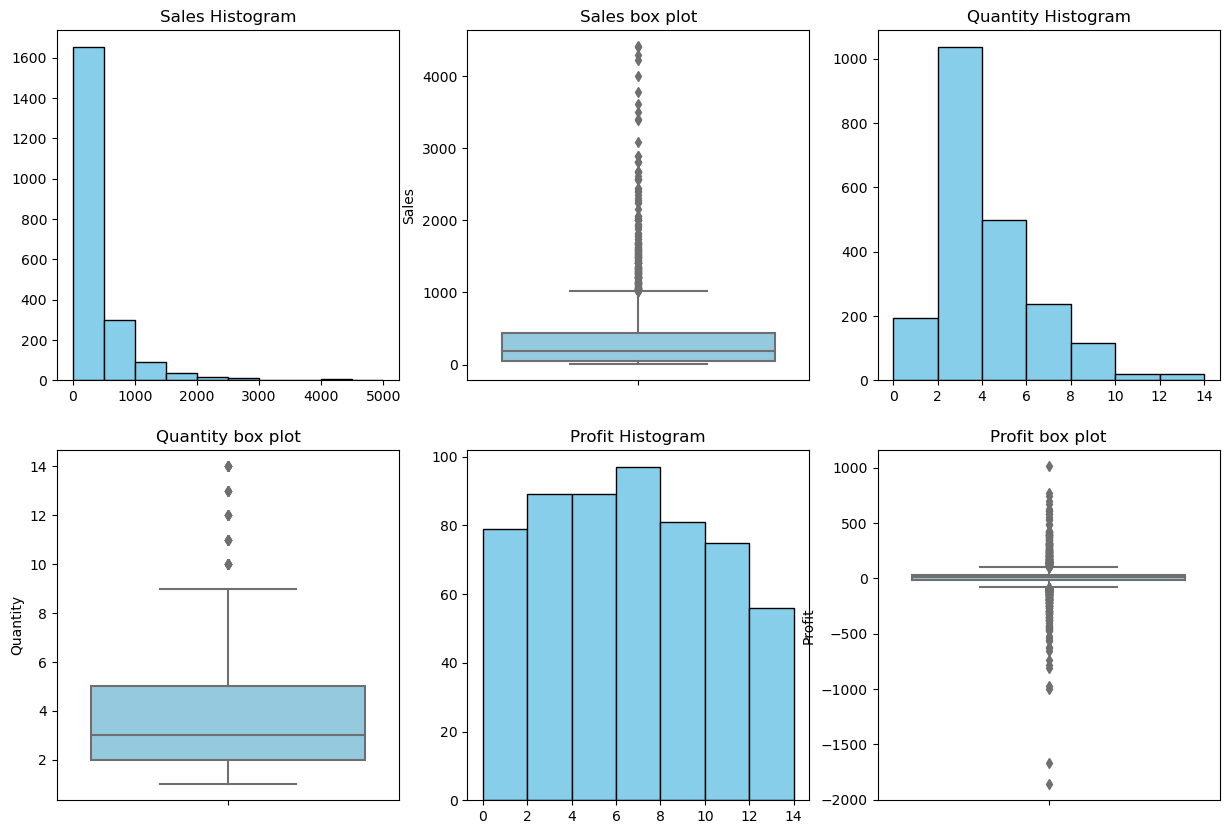

In [41]:
# Visualizing numeric columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) #creates the frame to fill the plots in

# Histogram of sales 
axes[0, 0].hist(Sales_data['Sales'], bins=(0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000), color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sales Histogram')

# Box plot of sales
sns.boxplot(y=Sales_data['Sales'], color='skyblue', ax=axes[0, 1])
plt.ylabel('Sales')
axes[0, 1].set_title('Sales box plot')

# Histogram of Quantity 
axes[0, 2].hist(Sales_data['Quantity'], bins=(0,2,4,6,8,10,12,14), color='skyblue', edgecolor='black')
axes[0, 2].set_title('Quantity Histogram')

# Box plot of Quantity
sns.boxplot(y=Sales_data['Quantity'], color='skyblue', ax=axes[1, 0])
plt.ylabel('Quantity')
axes[1,0].set_title('Quantity box plot')

# Histogram of Profit 
axes[1, 1].hist(Sales_data['Profit'], bins=(0,2,4,6,8,10,12,14), color='skyblue', edgecolor='black')
axes[1, 1].set_title('Profit Histogram')

# Box plot of Profit
sns.boxplot(y=Sales_data['Profit'], color='skyblue', ax=axes[1, 2])
axes[1,2].set_title('Profit box plot')
# Bar plot
#Sales_data.groupby('Ship Mode')['Sales'].sum().plot(kind='bar', color='skyblue', ax=axes[1, 0])

plt.show()


## 2. Clean data

In [13]:
Sales_data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
Sales_data.columns

## 3. Visualise data

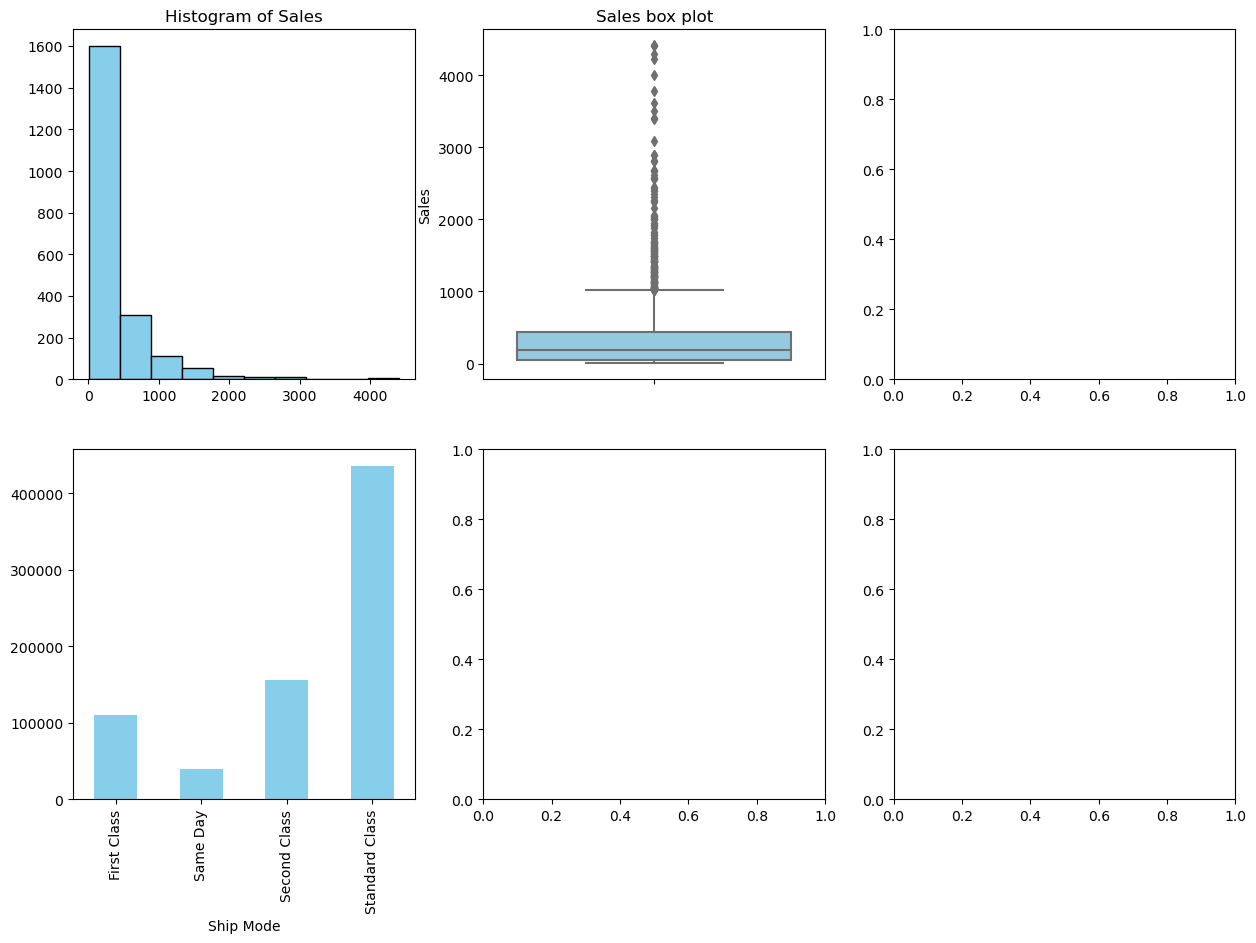

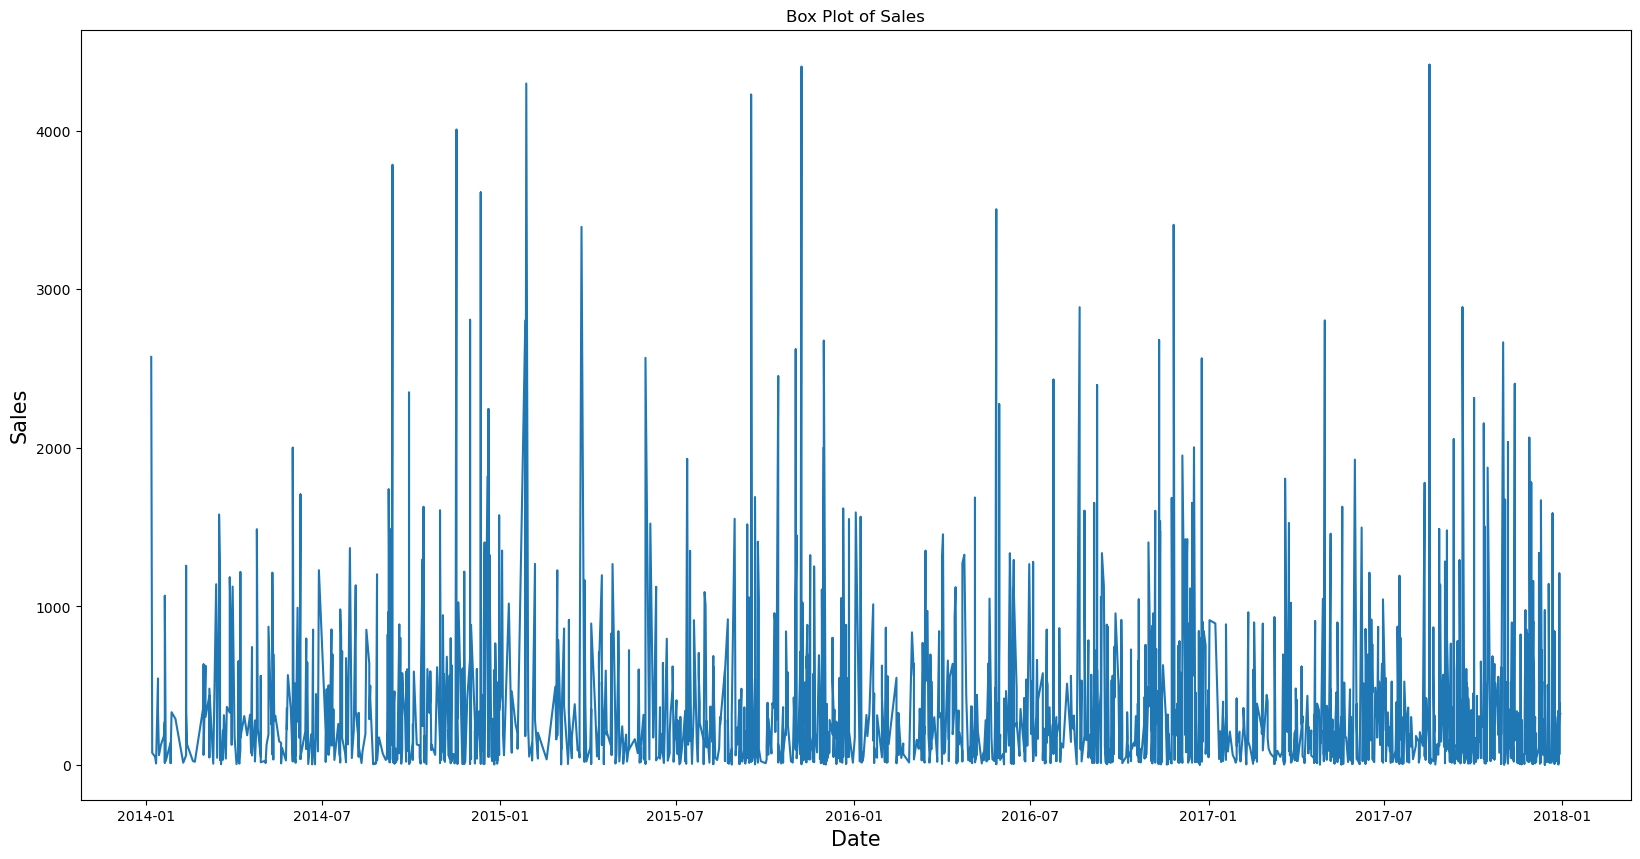

In [45]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#ordering the date time object to visualise how sales change over time
Sales_data.sort_values(by='Order Date', inplace = True) 
# plotting the line graph of sales by date
plt.figure(figsize=(20, 10))
plt.plot(Sales_data["Order Date"],Sales_data["Sales"])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales', fontsize=15)


# Pair plot
#sns.pairplot(Sales_data)
#set_title('Pair Plot of Numerical Columns')

# Display the plot
plt.show()


## 4. Identify correlated variables

In [5]:
#

## 5. Summary